In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree
from sklearn import metrics

# To change scientific numbers to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

# Increase the size of sns plots
sns.set(rc = {'figure.figsize':(8 , 6)})

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, ConfusionMatrixDisplay

In [219]:

#read file
data = pd.read_excel('dataset.xls', header=None, skiprows = 1) # Skip header 
#data = data.sample(frac = 1) # Shuffling the data to avoid overfitting
print(data.shape)

# Display first 5 rows
print(data.head())

(352, 29)
     0    1    2    3    4    5     6     7     8   9   ...    19    20  21  \
0  10.0   15   25   30   30   35  35.0  40.0  45.0 NaN  ...  45.0  50.0 NaN   
1   5.0    5   10   10    5    5  20.0  10.0  35.0 NaN  ...  10.0  20.0 NaN   
2  45.0   45   35   35   25   35  45.0  45.0  55.0 NaN  ...  15.0  15.0 NaN   
3   NaN  110  115  115  115  115   NaN   NaN   NaN NaN  ...  35.0  30.0 NaN   
4  20.0   20   20   20   20   30  35.0  60.0  70.0 NaN  ...  45.0  50.0 NaN   

          22     23          24  \
0  25.555556  20.00  beidseitig   
1   7.777778   6.25  beidseitig   
2  13.888889  13.75      rechts   
3  15.000000   8.75  beidseitig   
4  25.000000  20.00  beidseitig   

                                                  25  \
0                                         bestimmbar   
1  nicht bestimmbar (z.B. Rauschen, Zischen, Knat...   
2                                         bestimmbar   
3  nicht bestimmbar (z.B. Rauschen, Zischen, Knat...   
4                       

In [220]:
# computing number of rows
rows = len(data.axes[0])
 
# computing number of columns
cols = len(data.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

print("Total Number of NaN's:   ", data.isna().sum().sum())

Number of Rows:  352
Number of Columns:  29
Total Number of NaN's:    1176


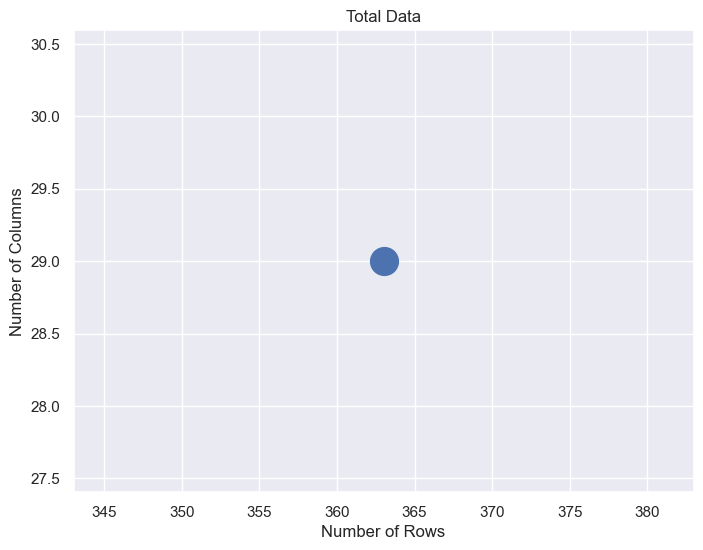

In [221]:
x = np.array([363])
y = np.array([29])

plt.plot(x, y, marker = 'o', ms = 20)

plt.xlabel("Number of Rows")
plt.ylabel("Number of Columns")
plt.title("Total Data")
plt.show()

In [222]:
print('Number of Null Values in every Column')
data.isnull().sum()

Number of Null Values in every Column


0       1
1       0
2       0
3       0
4       0
5       0
6       2
7       2
8       4
9     346
10      0
11      0
12      3
13      2
14      2
15      2
16      2
17      2
18      3
19      4
20      7
21    347
22      2
23      2
24      0
25     65
26     53
27    174
28    151
dtype: int64

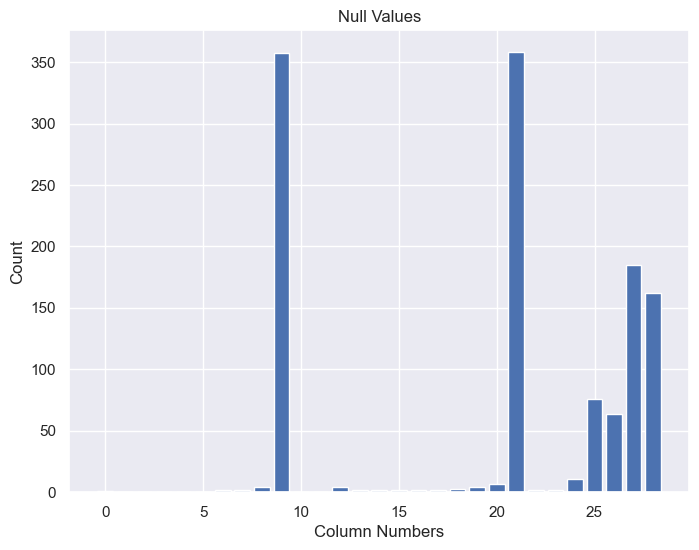

In [223]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
y = np.array([1, 0, 0, 0, 0, 0, 2, 2, 4, 357, 0, 0, 4, 2, 2, 2, 2, 2, 3, 4, 7, 358, 2, 2, 11, 76, 64, 185, 162])

plt.bar(x, y)
plt.xlabel("Column Numbers")
plt.ylabel("Count")
plt.title("Null Values")
plt.show()

In [224]:
# Get the count of Zeros in all columns 
count = (data == 0).sum()

print('Number of zeros in every Column ')
print(count)

Number of zeros in every Column 
0     32
1     29
2     11
3      9
4      5
5      3
6      5
7      2
8      3
9      0
10     0
11     1
12    38
13    37
14    10
15     9
16     4
17     3
18     2
19     2
20     4
21     0
22     0
23     1
24     0
25     0
26     0
27     0
28     0
dtype: int64


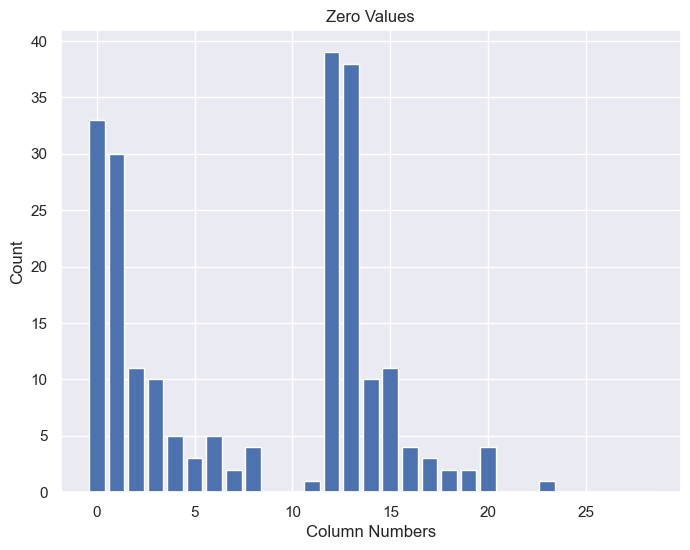

In [225]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
y = np.array([33, 30, 11, 10, 5, 3, 5, 2, 4, 0, 0, 1, 39, 38, 10, 11, 4, 3, 2, 2, 4, 0, 0, 1, 0, 0, 0, 0, 0])

plt.bar(x, y)
plt.xlabel("Column Numbers")
plt.ylabel("Count")
plt.title("Zero Values")
plt.show()

In [226]:
#Rows Containing Null
data.isna().any(axis=1).sum() # Cannot drop rows 


348

In [227]:
#print(raw_data.columns)

# Remove column names 'HL_LL_10000_re.sp_A Luftleitung Hörleistung 10 kHz links (dB)' and 'HL_LL_10000_re.sp_A Luftleitung Hörleistung 10 kHz rechts (dB)'
#raw_data = raw_data.drop([16, 17], axis=1)
#raw_data.drop(['HL_LL_10000_re.sp_A Luftleitung Hörleistung 10 kHz links (dB)'], axis=1)
#raw_data.drop(['HL_LL_10000_re.sp_A Luftleitung Hörleistung 10 kHz rechts (dB)'], axis=1)

In [228]:

print(data.isna().any(axis=1).sum()) # Cannot drop rows 

print(data.isna().any(axis=0).sum()) # Every column have NaN's

348
21


In [229]:
data = data.fillna(-1) # Replacing NaN's with -1 because there are so much 0's and 0 is a datapoint
data.isna().sum().sum()

0

In [230]:
object_cols = data.select_dtypes(include='object') # Check Which columns contain string values 
object_cols.head()

,24,25,26,27,28
0,beidseitig,bestimmbar,bestimmbar,SBR,SBR
1,beidseitig,"nicht bestimmbar (z.B. Rauschen, Zischen, Knat...","nicht bestimmbar (z.B. Rauschen, Zischen, Knat...",-1,-1
2,rechts,bestimmbar,-1,SBR,-1
3,beidseitig,"nicht bestimmbar (z.B. Rauschen, Zischen, Knat...",bestimmbar,-1,SIN
4,beidseitig,bestimmbar,bestimmbar,SIN,SIN


In [231]:
 # What different values we have in String Columns
print(object_cols[24].unique())
print('')
print('')
print(object_cols[25].unique())
print('')
print('')
print(object_cols[26].unique())
print('')
print('')
print(object_cols[27].unique())
print('')
print('')
print(object_cols[28].unique())

['beidseitig' 'rechts' 'links']


['bestimmbar'
 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'
 -1]


['bestimmbar'
 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'
 -1]


['SBR' -1 'SIN']


['SBR' -1 'SIN']


In [232]:
print(data[26][86])

bestimmbar


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       352 non-null    float64
 1   1       352 non-null    int64  
 2   2       352 non-null    int64  
 3   3       352 non-null    int64  
 4   4       352 non-null    int64  
 5   5       352 non-null    int64  
 6   6       352 non-null    float64
 7   7       352 non-null    float64
 8   8       352 non-null    float64
 9   9       352 non-null    float64
 10  10      352 non-null    float64
 11  11      352 non-null    float64
 12  12      352 non-null    float64
 13  13      352 non-null    float64
 14  14      352 non-null    float64
 15  15      352 non-null    float64
 16  16      352 non-null    float64
 17  17      352 non-null    float64
 18  18      352 non-null    float64
 19  19      352 non-null    float64
 20  20      352 non-null    float64
 21  21      352 non-null    float64
 22  22

In [234]:
data.describe().style.background_gradient(cmap = 'tab20c')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,11.928977,12.514205,15.099432,17.914773,20.568182,25.525568,30.960227,35.392045,37.147727,-0.031250,23.314828,19.925426,10.659091,11.372159,14.170455,17.238636,20.747159,26.471591,32.434659,36.366477,38.460227,-0.076705,23.365767,19.751657
std,11.924648,13.660508,13.537067,14.640560,15.765045,17.801355,19.166941,20.567996,22.746611,7.866525,14.477538,13.670717,9.976481,12.154542,13.441842,14.015453,15.929018,18.684646,20.710080,21.142693,22.696275,8.067544,14.166310,13.569079
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.555556,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,15.000000,20.000000,20.000000,-1.000000,12.222222,10.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,15.000000,20.000000,20.000000,-1.000000,12.777778,10.000000
50%,10.000000,10.000000,10.000000,15.000000,15.000000,20.000000,30.000000,35.000000,35.000000,-1.000000,20.555556,17.500000,10.000000,5.000000,10.000000,15.000000,15.000000,25.000000,30.000000,35.000000,40.000000,-1.000000,21.388889,17.500000
75%,15.000000,15.000000,20.000000,25.000000,30.000000,35.000000,40.000000,50.000000,55.000000,-1.000000,30.555556,26.250000,15.000000,15.000000,20.000000,25.000000,30.000000,35.000000,45.000000,50.000000,55.000000,-1.000000,31.111111,26.250000
max,80.000000,110.000000,115.000000,115.000000,115.000000,115.000000,95.000000,110.000000,100.000000,80.000000,114.000000,113.333333,65.000000,105.000000,100.000000,90.000000,90.000000,105.000000,110.000000,110.000000,100.000000,80.000000,98.000000,98.333333


# Condition Number 1

In [235]:
data[27] = np.where(
    (data[24] == 'beidseitig') & (data[25] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)') & (data[26] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'),
    'complex',
    data[27]
)
data[28] = np.where(
    (data[24] == 'beidseitig') & (data[25] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)') & (data[26] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'),
    'complex',
    data[28]
)


print(data[27][1])
print(data[28][1])

complex
complex


# Condition number 2

In [236]:
data[27] = np.where(
    (data[24] == 'beidseitig') & (data[25] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)') & (data[26] == 'bestimmbar'),
    'complex',
    data[27]
)
# Column number 28 already have value SBR / SIN

print(data[27][3])
print(data[28][3])

complex
SIN


# Condition number 3

In [237]:
data[28] = np.where(
    (data[24] == 'beidseitig') & (data[25] == 'bestimmbar') & (data[26] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'),
    'complex',
    data[28]
)


print(data[27][7])
print(data[28][7])

SBR
complex


# Condition number 4

In [238]:
# Replace the values of 26 that have -1 with 'empty'

data[26] = np.where(
    (data[24] == 'rechts') & (data[25] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'),
    'empty',
    data[26]
)

# Replacing the desired Value
data[27] = np.where(
    (data[24] == 'rechts') & (data[25] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)') & (data[26] == 'empty'),
    'complex',
    data[27]
)
data[28] = np.where(
    (data[24] == 'rechts') & (data[25] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)') & (data[26] == 'empty'),
    'no tinnitus',
    data[28]
)


print(data[27][22])
print(data[28][22])

complex
no tinnitus


# Condition number 5

In [239]:
# Replace the values of 26 that have -1 with 'empty'

data[26] = np.where(
    (data[24] == 'rechts') & (data[25] == 'bestimmbar'),
    'empty',
    data[26]
)

# Replacing the desired Value

data[28] = np.where(
    (data[24] == 'rechts') & (data[25] == 'bestimmbar') & (data[26] == 'empty'),
    'no tinnitus',
    data[28]
)


print(data[27][24])
print(data[28][24])

SIN
no tinnitus


# Condition number 6

In [240]:
# Replace the values of 25 that have -1 with 'empty'

data[25] = np.where(
    (data[24] == 'links'),
    'empty',
    data[25]
)

# Replacing the desired Value

data[27] = np.where(
    (data[24] == 'links') & (data[25] == 'empty') & (data[26] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'),
    'no tinnitus',
    data[27]
)

data[28] = np.where(
    (data[24] == 'links') & (data[25] == 'empty') & (data[26] == 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'),
    'complex',
    data[28]
)

print(data[27][6])
print(data[28][6])

no tinnitus
complex


# Condition number 7

In [241]:
# Replace the values of 25 that have -1 with 'empty'

data[25] = np.where(
    (data[24] == 'links'),
    'empty',
    data[25]
)

# Replacing the desired Value

data[27] = np.where(
    (data[24] == 'links') & (data[25] == 'empty') & (data[26] == 'bestimmbar'),
    'no tinnitus',
    data[27]
)



print(data[27][18])
print(data[28][18])

no tinnitus
SIN


In [242]:
 # What different values we have in String Columns
print(data[24].unique())
print('')
print('')
print(data[25].unique())
print('')
print('')
print(data[26].unique())
print('')
print('')
print(data[27].unique())
print('')
print('')
print(data[28].unique())

['beidseitig' 'rechts' 'links']


['bestimmbar'
 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'
 'empty']


['bestimmbar'
 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'
 'empty' -1]


['SBR' 'complex' 'SIN' 'no tinnitus' -1]


['SBR' 'complex' 'no tinnitus' 'SIN' -1]


# There still left some rows which are not assigned values properly

In [243]:
data.loc[data[26] == -1]

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
93,15.0,15,10,15,25,30,40.0,50.0,65.0,-1.0,...,50.0,65.0,-1.0,28.888889,22.5,beidseitig,"nicht bestimmbar (z.B. Rauschen, Zischen, Knat...",-1,-1,-1


In [244]:
data.loc[data[27] == -1]

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
93,15.0,15,10,15,25,30,40.0,50.0,65.0,-1.0,...,50.0,65.0,-1.0,28.888889,22.5,beidseitig,"nicht bestimmbar (z.B. Rauschen, Zischen, Knat...",-1,-1,-1


In [245]:
data.loc[data[28] == -1]

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
93,15.0,15,10,15,25,30,40.0,50.0,65.0,-1.0,...,50.0,65.0,-1.0,28.888889,22.5,beidseitig,"nicht bestimmbar (z.B. Rauschen, Zischen, Knat...",-1,-1,-1



# Currently the values difference from excel sheel and here is -2

In [ ]:
# Which means row number 95 in excel is row number 93 here

In [247]:
data.loc[data[26] == -1]

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
93,15.0,15,10,15,25,30,40.0,50.0,65.0,-1.0,...,50.0,65.0,-1.0,28.888889,22.5,beidseitig,"nicht bestimmbar (z.B. Rauschen, Zischen, Knat...",-1,-1,-1


In [248]:
row_to_delete = 93  

# Delete the row using the drop method
data = data.drop(row_to_delete)

# Reset the index after dropping the row (optional)
data = data.reset_index(drop=True)

In [249]:
 # What different values we have in String Columns
print(data[24].unique())
print('')
print('')
print(data[25].unique())
print('')
print('')
print(data[26].unique())
print('')
print('')
print(data[27].unique())
print('')
print('')
print(data[28].unique())

['beidseitig' 'rechts' 'links']


['bestimmbar'
 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'
 'empty']


['bestimmbar'
 'nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)'
 'empty']


['SBR' 'complex' 'SIN' 'no tinnitus']


['SBR' 'complex' 'no tinnitus' 'SIN']


# Check the difference between excel data and data here

In [250]:

row_number = 105

# Use iloc to access the row
row_105 = data.iloc[row_number]

print(row_105)

0            0.0
1              5
2             20
3             30
4             20
5             15
6           30.0
7           30.0
8           25.0
9           -1.0
10     19.444444
11         18.75
12           0.0
13           0.0
14          15.0
15          15.0
16          15.0
17           5.0
18           5.0
19          15.0
20          25.0
21          -1.0
22     10.555556
23          8.75
24    beidseitig
25    bestimmbar
26    bestimmbar
27           SIN
28           SIN
Name: 105, dtype: object


# Row number 105 here is 108 in excel

In [251]:
# How much number of different strings are present in the columns
count_24 = data[24].value_counts()
print(count_24)
print('')
count_25 = data[25].value_counts()
print(count_25)
print('')
count_26 = data[26].value_counts()
print(count_26)
print('')
count_27 = data[27].value_counts()
print(count_27)
print('')
count_28 = data[28].value_counts()
print(count_28)


24
beidseitig    230
links          65
rechts         56
Name: count, dtype: int64

25
bestimmbar                                                                                     178
nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)    108
empty                                                                                           65
Name: count, dtype: int64

26
bestimmbar                                                                                     200
nicht bestimmbar (z.B. Rauschen, Zischen, Knattern, oder während Testung nicht wahrnehmbar)     95
empty                                                                                           56
Name: count, dtype: int64

27
SIN            130
complex        108
no tinnitus     65
SBR             48
Name: count, dtype: int64

28
SIN            147
complex         95
no tinnitus     56
SBR             53
Name: count, dtype: int64


In [252]:
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns

# # Print the entire column data[27]
# print(data.iloc[:, 27])

# # Reset display options to default if needed
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

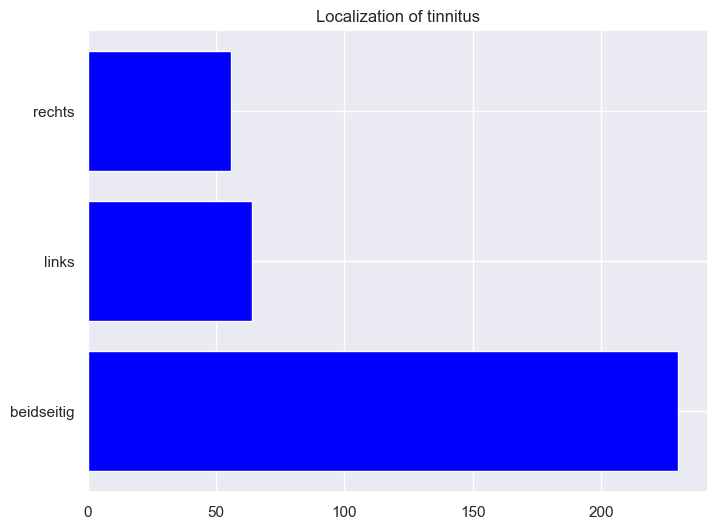

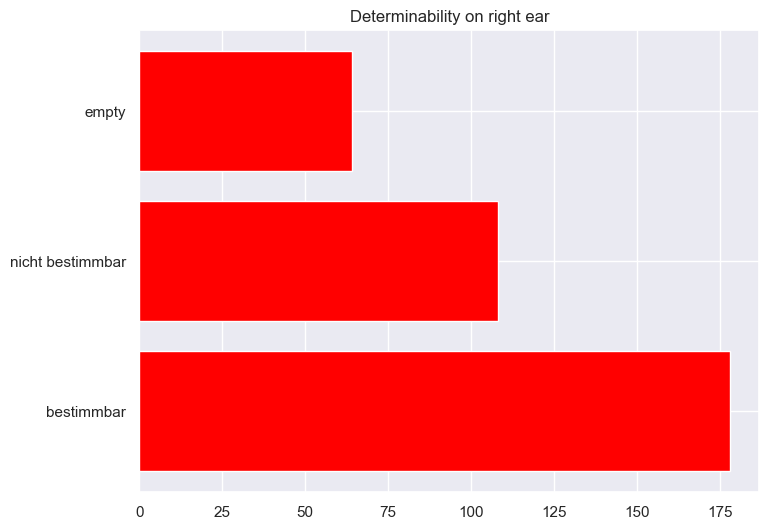

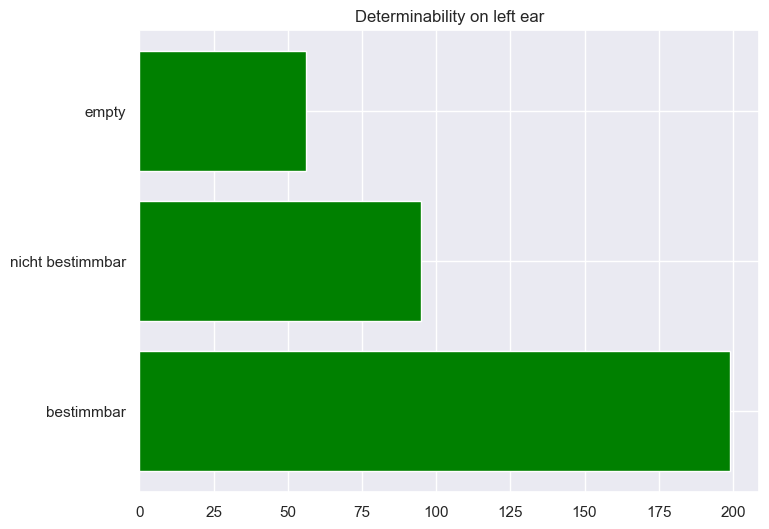

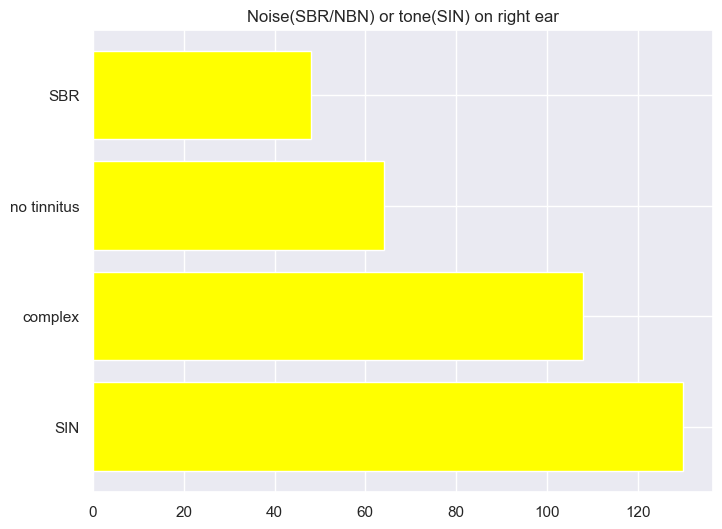

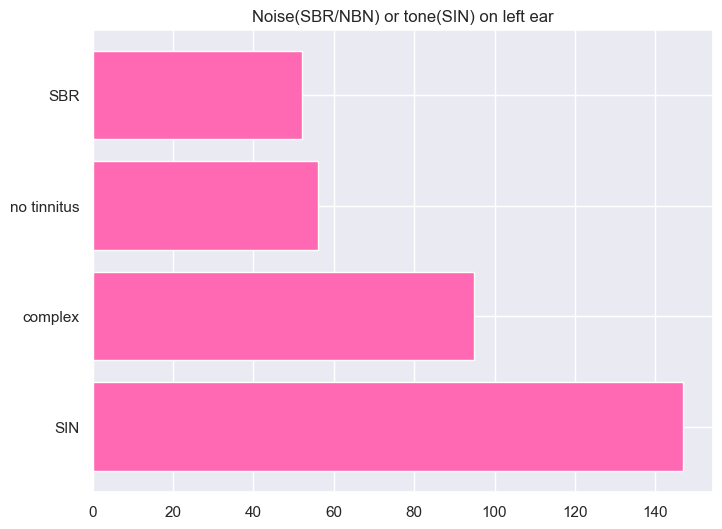

In [7]:
x = np.array(["beidseitig", "links", "rechts"])
y = np.array([230, 64, 56])
plt.barh(x, y, color = "blue")
plt.title("Localization of tinnitus")
plt.show()

x = np.array(["bestimmbar", "nicht bestimmbar", "empty"])
y = np.array([178, 108, 64])
plt.barh(x, y, color = "red")
plt.title("Determinability on right ear")
plt.show()

x = np.array(["bestimmbar", "nicht bestimmbar", "empty"])
y = np.array([199, 95, 56])
plt.barh(x, y, color = "green")
plt.title("Determinability on left ear")
plt.show()

x = np.array(["SIN", "complex", "no tinnitus", "SBR"])
y = np.array([130, 108, 64, 48])
plt.barh(x, y, color = "yellow")
plt.title("Noise(SBR/NBN) or tone(SIN) on right ear")
plt.show()

x = np.array(["SIN", "complex", "no tinnitus", "SBR"])
y = np.array([147, 95, 56, 52])
plt.barh(x, y, color = "hotpink")
plt.title("Noise(SBR/NBN) or tone(SIN) on left ear")
plt.show()

# Merge the Column values 

In [254]:
#data[29] = data[24] + '-' +  data[25] + '-' + data[26] + '-'+ data[27] + '-' + data[28] # If want some sapce or - then:  + '_' + 


# Applying the Condition if the predicted lable is rechts then it should be rechts-SIN, rechts-SBR, rechts-complex
# and same for the left ear

# Apply conditions using DataFrame operations
data.loc[data[24] == 'rechts', 29] = data[24] + '-' + data[27]
data.loc[data[24] == 'links', 29] = data[24] + '-' + data[28]
data.loc[data[24] == 'beidseitig', 29] = data[24] + '-' + data[27] + '-' + data[28]


# Applying labelEncoder on this column to make the values 0,1,2
so that machine learning algorithms can work with them more effectively

In [255]:


temp_1 = LabelEncoder()

data[29] = temp_1.fit_transform(data[29])
mapping = dict(zip(temp_1.classes_, temp_1.transform(temp_1.classes_)))

print("Character to Encoded Integer Mapping:")
print(mapping)

Character to Encoded Integer Mapping:
{'beidseitig-SBR-SBR': 0, 'beidseitig-SBR-SIN': 1, 'beidseitig-SBR-complex': 2, 'beidseitig-SIN-SBR': 3, 'beidseitig-SIN-SIN': 4, 'beidseitig-SIN-complex': 5, 'beidseitig-complex-SBR': 6, 'beidseitig-complex-SIN': 7, 'beidseitig-complex-complex': 8, 'links-SBR': 9, 'links-SIN': 10, 'links-complex': 11, 'rechts-SBR': 12, 'rechts-SIN': 13, 'rechts-complex': 14}


# Now We only need column: 29 and 0 to 23
We can delete 24, 25, 26, 27, 28

In [256]:
columns_to_delete = [24, 25, 26, 27, 28]

# Drop the columns using the drop method
data = data.drop(columns=columns_to_delete)

print(data.head())

     0    1    2    3    4    5     6     7     8    9   ...    15    16  \
0  10.0   15   25   30   30   35  35.0  40.0  45.0 -1.0  ...  15.0  20.0   
1   5.0    5   10   10    5    5  20.0  10.0  35.0 -1.0  ...   5.0  10.0   
2  45.0   45   35   35   25   35  45.0  45.0  55.0 -1.0  ...  15.0  20.0   
3  -1.0  110  115  115  115  115  -1.0  -1.0  -1.0 -1.0  ...  10.0   5.0   
4  20.0   20   20   20   20   30  35.0  60.0  70.0 -1.0  ...  10.0  15.0   

     17    18    19    20   21         22     23  29  
0  30.0  30.0  45.0  50.0 -1.0  25.555556  20.00   0  
1   5.0   5.0  10.0  20.0 -1.0   7.777778   6.25   8  
2  20.0  15.0  15.0  15.0 -1.0  13.888889  13.75  12  
3  20.0  20.0  35.0  30.0 -1.0  15.000000   8.75   7  
4  25.0  30.0  45.0  50.0 -1.0  25.000000  20.00   4  

[5 rows x 25 columns]


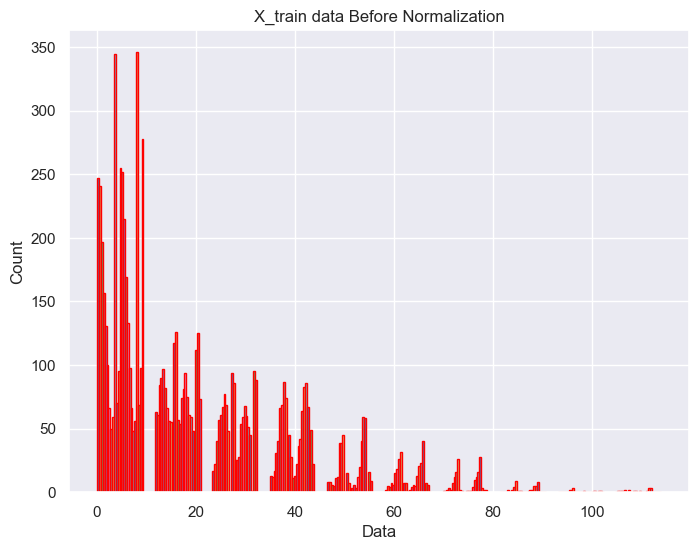

In [257]:
# All the Data before Normalization
plt.hist(data, ec="red")
plt.title("X_train data Before Normalization")
plt.xlabel("Data")
plt.ylabel("Count")
plt.show()

# Separating Dependent and Independent features in X and Y 
# for Right Ear first

In [258]:
Y = data[29]

X_right = data.iloc[:, 0:9]
print('Predictor Variables')
print(X_right.head())
print('Target Feature')
print(Y.head())
# X = X.drop([9], axis=1)  # 9 and 21 contain so many Null's so dropped them
# X = X.drop([21], axis=1)  

Predictor Variables
      0    1    2    3    4    5     6     7     8
0  10.0   15   25   30   30   35  35.0  40.0  45.0
1   5.0    5   10   10    5    5  20.0  10.0  35.0
2  45.0   45   35   35   25   35  45.0  45.0  55.0
3  -1.0  110  115  115  115  115  -1.0  -1.0  -1.0
4  20.0   20   20   20   20   30  35.0  60.0  70.0
Target Feature
0     0
1     8
2    12
3     7
4     4
Name: 29, dtype: int32


# Let's Check how much values of Y are going to contribute for Predictions
If there is Data Imbalance

In [259]:
print(np.unique(Y.values,  return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([30,  4,  2,  2, 99,  5,  6, 11, 71, 15, 33, 17, 12, 24, 20],
      dtype=int64))


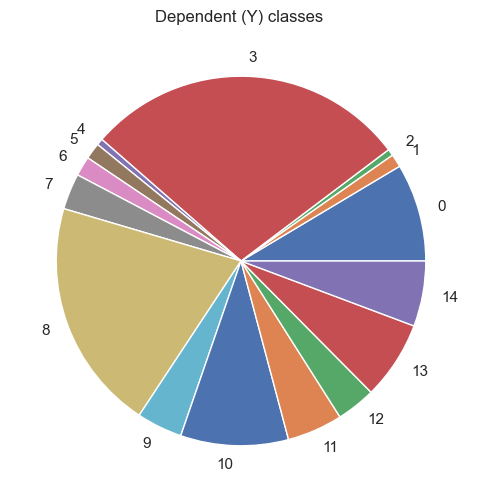

In [260]:
y = np.array([30,  4,  2, 99,  2,  5,  6, 11, 71, 14, 33, 17, 12, 24, 20])
mylabels = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]
plt.title("Dependent (Y) classes ")
plt.pie(y, labels = mylabels)
plt.show()

# It's time to Split the Training and Testing data

In [261]:
X_train, X_test, Y_train, Y_test = train_test_split(X_right, Y, test_size = 0.2, random_state = 2)
print(X_right.shape, X_train.shape, X_test.shape)

(351, 9) (280, 9) (71, 9)


# To Check Which datatypes we have for every column
# It Should be float or int

In [262]:
print(data.dtypes) 

0     float64
1       int64
2       int64
3       int64
4       int64
5       int64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
29      int32
dtype: object


In [263]:
# Convert all columns to float type
data = data.astype(float)

In [264]:
print(data.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
29    float64
dtype: object


# Standard Normalizing the data before feeding to the models

The Common requirement for any machine learning model
It makes feature look like standard normally look-like data with mean 0 and Unit variance

In [265]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
mean = X_train_scaled.mean(axis = 0)
std = X_train_scaled.std(axis = 0)
print(X_train_scaled)

[[-0.131954 -0.157628 -0.770456 ... -1.093011 -0.755655 -0.309888]
 [-0.547091 -0.548212 -0.770456 ... -1.093011 -1.000600 -1.412132]
 [-0.131954 0.232955 -0.373168 ... 0.219577 -0.020820 -0.089439]
 ...
 [-0.131954 -0.157628 0.421410 ... -0.305458 -0.510710 -1.191683]
 [-0.547091 -0.548212 -0.770456 ... -0.305458 -0.265765 -0.309888]
 [-0.131954 -0.157628 0.818698 ... -0.042940 0.958960 1.012805]]


Mean of Normalized/Standardized data
[0.000000 0.000000 -0.000000 -0.000000 -0.000000 0.000000 -0.000000
 0.000000 -0.000000]
Standard deviation of Normalized/Standardized data
[1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 1.000000]


Text(0.5, 0, 'Standard Deviation')

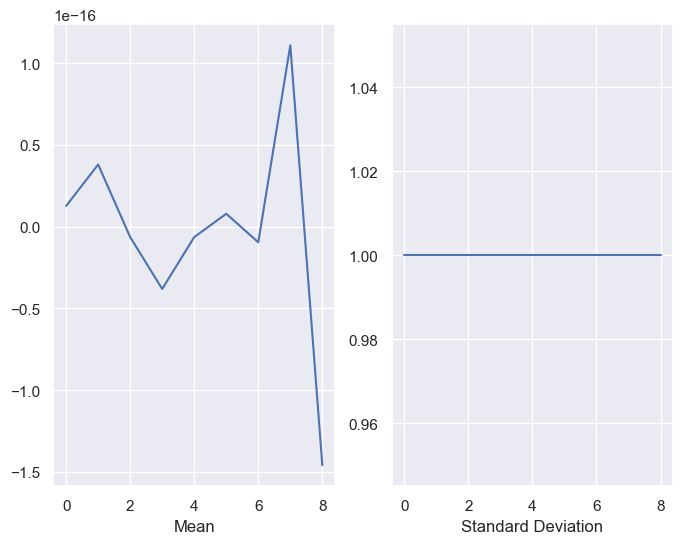

In [266]:
print("Mean of Normalized/Standardized data")
print(mean)
print("Standard deviation of Normalized/Standardized data")
print(std)
plt.subplot(1, 2, 1)
plt.plot(mean)
plt.xlabel("Mean")
plt.subplot(1, 2, 2)
plt.plot(std)
plt.xlabel("Standard Deviation")

In [267]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
mean = X_test_scaled.mean(axis = 0)
std = X_test_scaled.std(axis = 0)
print(X_test_scaled)

[[0.597343 0.034191 0.494583 0.031734 0.125922 -0.334429 -0.071144
  0.708389 1.659443]
 [-0.725256 -0.572691 -0.405812 -0.531545 -0.432856 -0.334429 0.183969
  -0.239690 -0.537061]
 [0.597343 0.337632 0.194451 0.031734 0.125922 0.686837 1.459535 1.419448
  1.000492]
 [-0.725256 -0.876132 -1.006075 -0.813185 -0.991634 -1.100378 -1.091597
  -0.950750 -1.415662]
 [0.156476 0.337632 0.194451 0.313374 0.405311 0.431521 0.439082
  -0.002671 0.121890]
 [0.156476 0.034191 -0.105680 -0.249906 0.125922 0.431521 0.439082
  0.708389 1.000492]
 [-0.284390 -0.572691 -0.705943 -0.813185 -0.991634 -0.589745 -0.071144
  0.234349 0.341541]
 [0.597343 0.641072 0.494583 0.595013 0.684700 0.431521 0.694196 1.419448
  1.220142]
 [-0.284390 -0.269250 0.194451 0.313374 -0.153467 -0.334429 -0.071144
  0.234349 0.121890]
 [-0.284390 -0.572691 -0.705943 -0.249906 -0.432856 -0.334429 0.183969
  -0.239690 -0.756711]
 [-0.725256 0.034191 -0.105680 0.595013 -0.432856 -0.334429 0.694196
  -0.239690 0.561191]
 [-0.72

Mean of Normalized/Standardized data
[0.000000 -0.000000 -0.000000 -0.000000 0.000000 -0.000000 -0.000000
 -0.000000 -0.000000]
Standard deviation of Normalized/Standardized data
[1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 1.000000]


Text(0.5, 0, 'Standard Deviation')

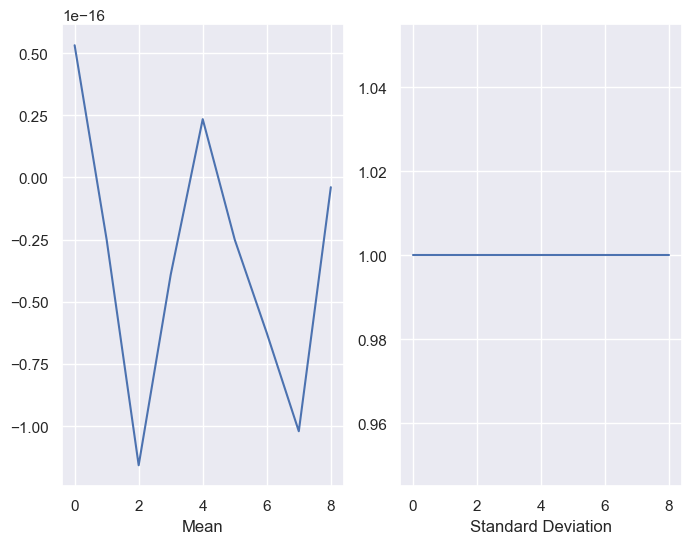

In [268]:
mean = X_test_scaled.mean(axis = 0)
std = X_test_scaled.std(axis = 0)
print("Mean of Normalized/Standardized data")
print(mean)
print("Standard deviation of Normalized/Standardized data")
print(std)
plt.subplot(1, 2, 1)
plt.plot(mean)
plt.xlabel("Mean")
plt.subplot(1, 2, 2)
plt.plot(std)
plt.xlabel("Standard Deviation")

In [317]:
# 1st Classifier Decision Tree for Y means 29th column
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha = 0.01, criterion="entropy", max_depth=3) 
clf = clf.fit(X_train_scaled, Y_train)
predictions = clf.predict(X_test_scaled)
#Checking the Accuracy score
print('Accuracy Score :  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy Score :   0.29577464788732394
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.33      0.81      0.47        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.27      0.29      0.28        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.30      0.30      0.30        71
   macro avg       0.04      0.07      0.

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

In [270]:
print(clf.feature_importances_)
print(clf.classes_)
print(clf.n_classes_)
print(clf.max_depth)
print(clf.min_samples_split)
print(clf.min_samples_leaf)

[0.159053 0.281872 0.148345 0.000000 0.065079 0.000000 0.000000 0.272034
 0.073617]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
15
3
2
1


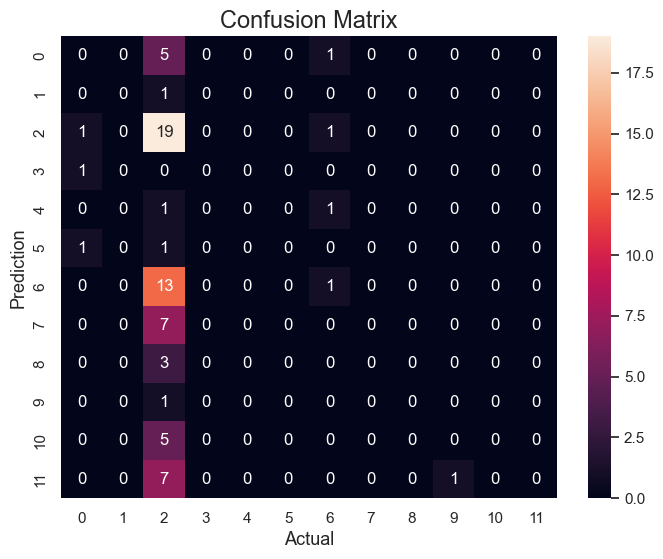

In [271]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [272]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


clf = RandomForestClassifier()
clf.fit(X_train_scaled, Y_train)
predictions = clf.predict(X_test_scaled)
#Checking the Accuracy score
print('Accuracy Score:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy Score:   0.22535211267605634
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.33      0.67      0.44        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.08      0.07      0.07        14
           9       0.00      0.00      0.00         0
          10       0.50      0.14      0.22         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.23      0.23      0.23        71
   macro avg       0.06      0.06      0.0

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

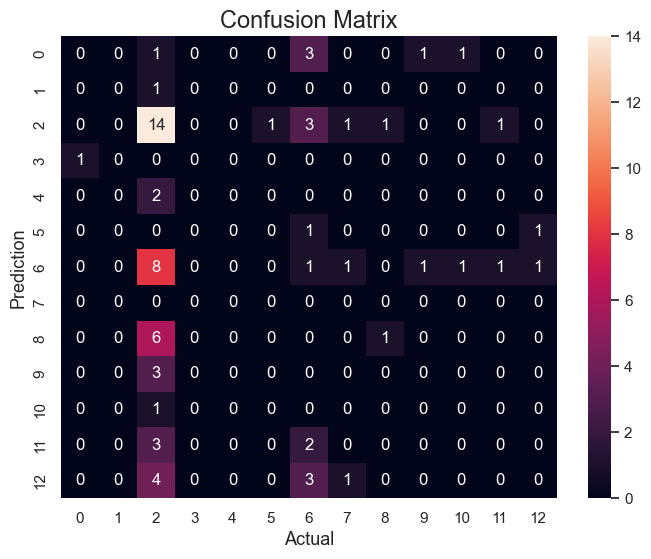

In [273]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [274]:
# param_dist = {'n_estimators': randint(50,500),
#               'max_depth': randint(1,20)}

# # Create a random forest classifier
# rf = RandomForestClassifier()

# # Use random search to find the best hyperparameters
# rand_search = RandomizedSearchCV(rf, 
#                                  param_distributions = param_dist, 
#                                  n_iter=5, 
#                                  cv=5)

# # Fit the random search object to the data
# rand_search.fit(X_train_scaled, Y_train)

# # Create a variable for the best model
# best_rf = rand_search.best_estimator_

# # Print the best hyperparameters
# print('Best hyperparameters:',  rand_search.best_params_)

# # Generate predictions with the best model
# y_pred = best_rf.predict(X_test_scaled)

# # Create the confusion matrix

# print('Accuracy Score:  ', accuracy_score(Y_test, y_pred))
# cm = metrics.confusion_matrix(Y_test, y_pred)
# print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

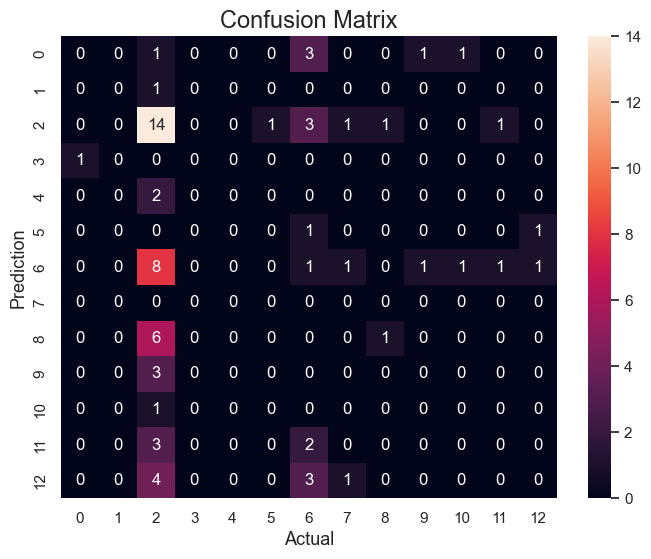

In [275]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [276]:
# 2nd Classifier 
# Trying with SVM
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_scaled, Y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test_scaled)

#Checking the Accuracy score
print('Accuracy:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy:   0.2535211267605634
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.26      0.81      0.40        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.20      0.07      0.11        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.25      0.25      0.25        71
   macro avg       0.03      0.06      0.03      

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

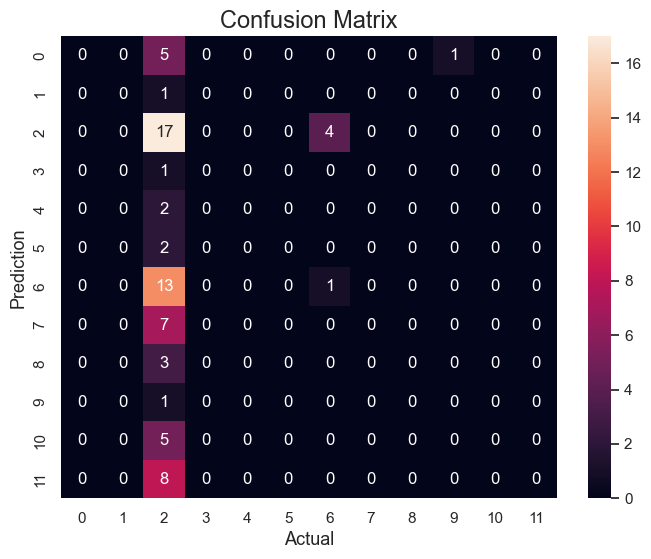

In [277]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [278]:
# Trying with Logistic Regression
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_scaled, Y_train)

predictions = logreg.predict(X_test_scaled)

#Checking the Accuracy score
print('Accuracy:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy:   0.2535211267605634
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.31      0.76      0.44        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.11      0.14      0.12        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.25      0.25      0.25        71
   macro avg       0.03      0.06      0.04      

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

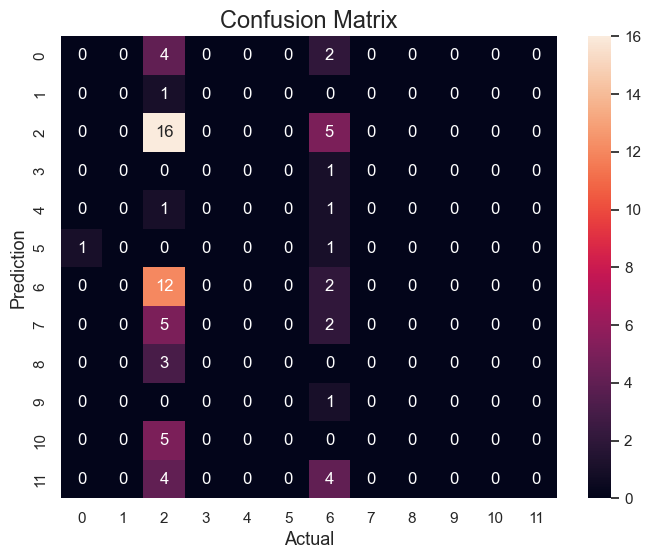

In [279]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [280]:
#Trying with Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_scaled, Y_train)
predictions = logreg.predict(X_test_scaled)
#Checking the Accuracy score
print('Accuracy:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy:   0.2535211267605634
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.31      0.76      0.44        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.11      0.14      0.12        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.25      0.25      0.25        71
   macro avg       0.03      0.06      0.04      

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

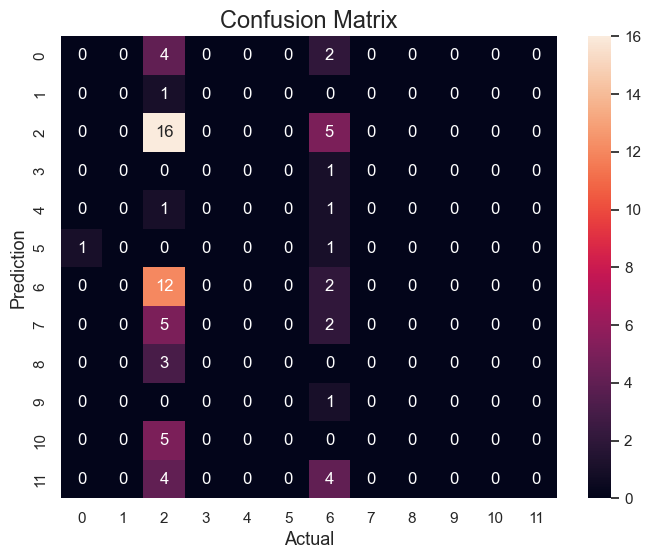

In [281]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


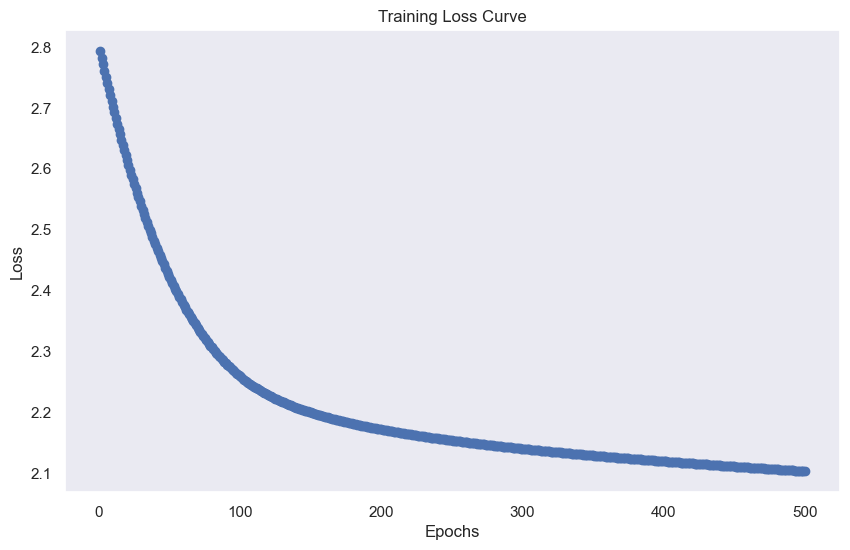

Accuracy: 0.29577464788732394
Confusion Matrix:
 [[ 0  0  5  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         1
         4.0       0.30      1.00      0.47        21
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00        14
        10.0       0.00      0.00      0.00      

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [318]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Create an MLP classifier
MLP = MLPClassifier(max_iter=500, activation='logistic', alpha=0.01, learning_rate='adaptive', hidden_layer_sizes=10)

# Train the MLP model
MLP.fit(X_train_scaled, Y_train)

# Get the training loss curve
loss_curve = MLP.loss_curve_

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(loss_curve) + 1), loss_curve, marker='o')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Make predictions and evaluate the model
predictions = MLP.predict(X_test_scaled)
print('Accuracy:', accuracy_score(Y_test, predictions))
cm = confusion_matrix(Y_test, predictions)
print('Confusion Matrix:\n', cm)
print(classification_report(Y_test, predictions, labels=np.unique(Y_test)))


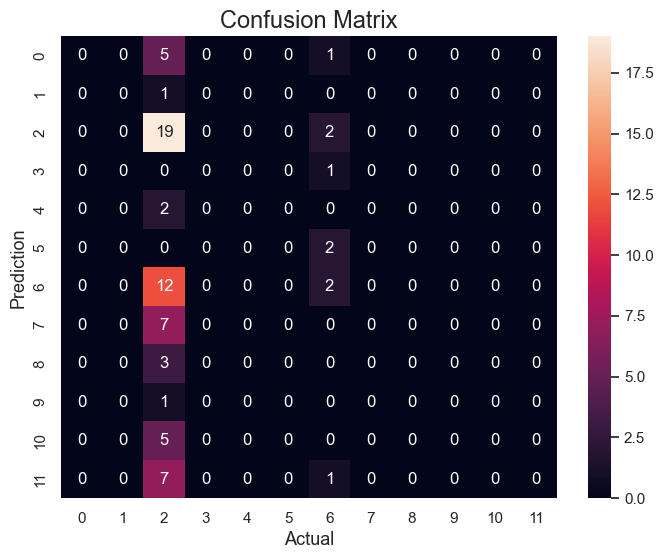

In [283]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [284]:
#Trying with Neural Network
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', 
                    alpha=0.001,
                    hidden_layer_sizes=(6, 2), 
                    random_state=1)
MLP.fit(X_train_scaled, Y_train)


predictions2 = MLP.predict(X_test_scaled)

print('Accuracy:  ', accuracy_score(Y_test, predictions2))
cm2 = metrics.confusion_matrix(Y_test, predictions2)
print(classification_report(Y_test, predictions2, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

# interpretations where errors.
# predict shape of tinnitus
# main finding in powerpoint
# 

Accuracy:   0.30985915492957744
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.33      0.86      0.48        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.33      0.29      0.31        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1

   micro avg       0.31      0.38      0.34        58
   macro avg       0.05      0.09      0.06        58
weighted avg       0.20      0.38      0.25        58



c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to co

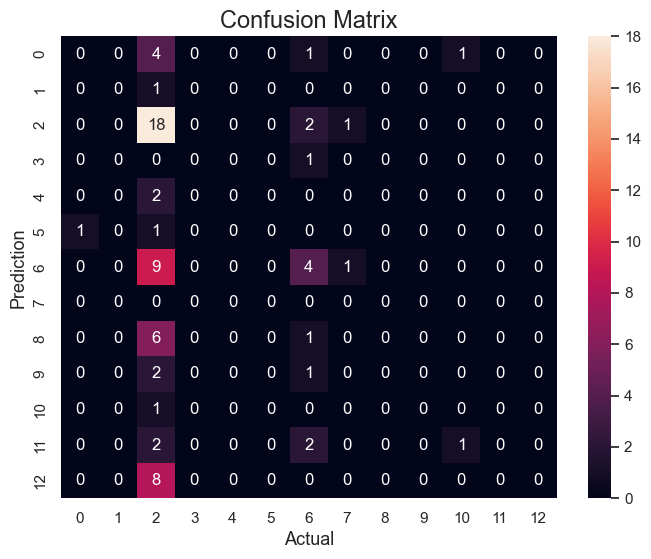

In [285]:
# Plot the confusion matrix.
sns.heatmap(cm2,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [286]:

# #from sklearn.model_selection import GridSearchCV

# parameters = {
#     'hidden_layer_sizes': [(100,), (200,), (300,)],  # Example values, adjust as needed
#     'activation': ['relu', 'tanh'],  # Example values, adjust as needed
#     'alpha': [0.0001, 0.001, 0.01]  # Example values, adjust as needed
# }

# grid_search = GridSearchCV(MLPClassifier(), parameters, cv=5)
# grid_search.fit(X_train_scaled, Y_train)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# predictions = grid_search.predict(X_test_scaled)

# print('Accuracy:  ', accuracy_score(Y_test, predictions))
# cm = metrics.confusion_matrix(Y_test, predictions)
# print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

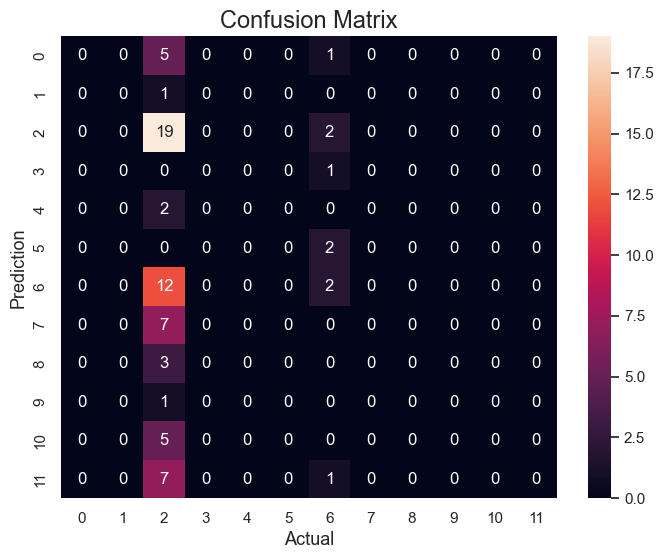

In [287]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [288]:
# ...................................................................................................................................................#

#                                 Left Ear

In [289]:
Y = data[29]

X_left = data.iloc[:, 12:21]
print('Predictor Variables')
print(X_left.head())
print('Target Feature')
print(Y.head())
# X = X.drop([9], axis=1)  # 9 and 21 contain so many Null's so dropped them
# X = X.drop([21], axis=1)  

Predictor Variables
     12    13    14    15    16    17    18    19    20
0  10.0  10.0  20.0  15.0  20.0  30.0  30.0  45.0  50.0
1   5.0   5.0   5.0   5.0  10.0   5.0   5.0  10.0  20.0
2   5.0  10.0  10.0  15.0  20.0  20.0  15.0  15.0  15.0
3   5.0   5.0   5.0  10.0   5.0  20.0  20.0  35.0  30.0
4  15.0  20.0  15.0  10.0  15.0  25.0  30.0  45.0  50.0
Target Feature
0     0.0
1     8.0
2    12.0
3     7.0
4     4.0
Name: 29, dtype: float64


# Let's Check how much values of Y are going to contribute for Predictions
If there is Data Imbalance

In [290]:
print(np.unique(Y.values,  return_counts=True))

(array([0.000000, 1.000000, 2.000000, 3.000000, 4.000000, 5.000000,
       6.000000, 7.000000, 8.000000, 9.000000, 10.000000, 11.000000,
       12.000000, 13.000000, 14.000000]), array([30,  4,  2,  2, 99,  5,  6, 11, 71, 15, 33, 17, 12, 24, 20],
      dtype=int64))


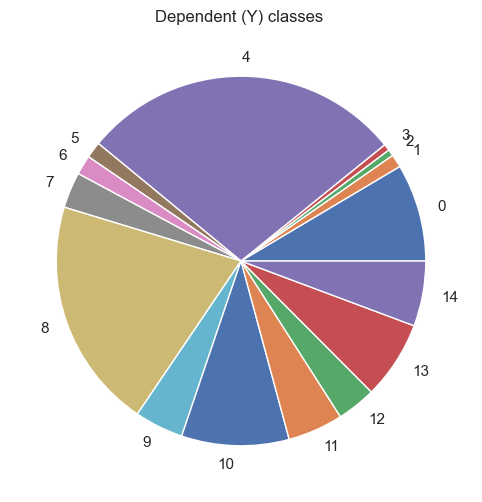

In [291]:
y = np.array([30,  4,  2, 2,  99,  5,  6, 11, 71, 15, 33, 17, 12, 24, 20])
mylabels = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]
plt.title("Dependent (Y) classes ")
plt.pie(y, labels = mylabels)
plt.show()

In [292]:
X_train, X_test, Y_train, Y_test = train_test_split(X_left, Y, test_size = 0.2, random_state = 2)
print(X_left.shape, X_train.shape, X_test.shape)

(351, 9) (280, 9) (71, 9)


In [293]:
print(data.dtypes) 

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
29    float64
dtype: object


In [294]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
mean = X_train_scaled.mean(axis = 0)
std = X_train_scaled.std(axis = 0)
print(X_train_scaled)

[[-0.563061 -0.537875 -0.691143 ... -1.122899 -0.793075 -0.848358]
 [-0.563061 -0.537875 -0.279223 ... -0.368190 -1.033714 -1.071066]
 [-0.563061 -0.053303 0.132697 ... 0.134949 0.650755 0.710597]
 ...
 [0.528747 -0.053303 0.132697 ... 0.134949 -0.552437 -0.625650]
 [-0.563061 -0.537875 -0.691143 ... -0.368190 -0.311799 -0.625650]
 [-0.017157 -0.053303 0.544617 ... 0.134949 0.650755 0.933305]]


Mean of Normalized/Standardized data
[0.000000 -0.000000 0.000000 -0.000000 -0.000000 -0.000000 0.000000
 0.000000 0.000000]
Standard deviation of Normalized/Standardized data
[1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 1.000000]


Text(0.5, 0, 'Standard Deviation')

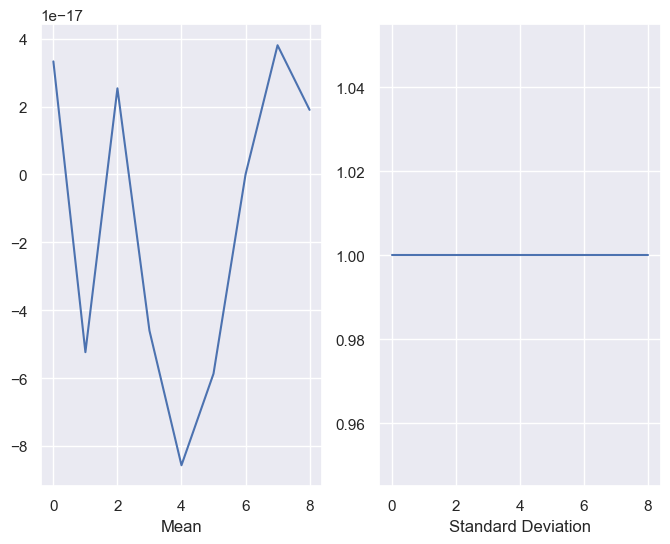

In [295]:
print("Mean of Normalized/Standardized data")
print(mean)
print("Standard deviation of Normalized/Standardized data")
print(std)
plt.subplot(1, 2, 1)
plt.plot(mean)
plt.xlabel("Mean")
plt.subplot(1, 2, 2)
plt.plot(std)
plt.xlabel("Standard Deviation")

In [296]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
mean = X_test_scaled.mean(axis = 0)
std = X_test_scaled.std(axis = 0)
print(X_test_scaled)

[[0.188165 0.025317 -0.129218 -0.294208 -0.442670 -0.600532 -0.117683
  -0.255284 -0.033326]
 [-0.211827 -0.264603 -0.417725 -0.294208 -0.184627 0.312482 0.515309
  0.858057 0.181777]
 [0.588157 0.315237 0.447794 0.885949 2.653838 2.595018 3.258274 3.307407
  -1.582067]
 [-0.611819 -0.554523 -0.706231 -0.884287 -0.700712 -1.057039 -1.172670
  -1.368625 -1.323943]
 [0.588157 0.315237 0.447794 0.295871 0.073415 0.084229 0.304312
  -0.032616 -0.033326]
 [0.188165 0.315237 -0.129218 -0.589248 -0.184627 -0.144025 0.093314
  0.412720 0.181777]
 [-0.611819 -0.554523 -0.706231 -0.884287 -0.700712 -0.828786 -0.750675
  -0.032616 -0.248429]
 [0.988149 0.605157 1.024807 1.771068 1.621669 1.910257 2.203288 2.416734
  2.332806]
 [-0.211827 -0.264603 0.159288 0.000831 -0.442670 -0.372278 -0.328680
  0.190052 1.257292]
 [-0.611819 -0.554523 -0.706231 -0.294208 -0.442670 -0.144025 0.093314
  -0.032616 0.181777]
 [-0.211827 0.315237 -0.129218 0.295871 0.331457 0.084229 0.937304
  1.080725 2.117703]
 [-

Mean of Normalized/Standardized data
[0.000000 0.000000 0.000000 -0.000000 -0.000000 0.000000 -0.000000
 -0.000000 0.000000]
Standard deviation of Normalized/Standardized data
[1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 1.000000]


Text(0.5, 0, 'Standard Deviation')

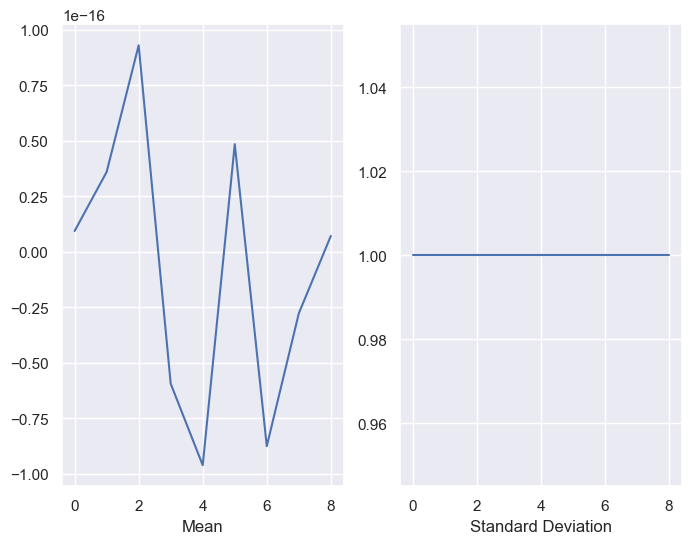

In [297]:
mean = X_test_scaled.mean(axis = 0)
std = X_test_scaled.std(axis = 0)
print("Mean of Normalized/Standardized data")
print(mean)
print("Standard deviation of Normalized/Standardized data")
print(std)
plt.subplot(1, 2, 1)
plt.plot(mean)
plt.xlabel("Mean")
plt.subplot(1, 2, 2)
plt.plot(std)
plt.xlabel("Standard Deviation")

In [298]:
# 1st Classifier Decision Tree for Y means 29th column
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha = 0.01, criterion="entropy", max_depth=3) 
clf = clf.fit(X_train_scaled, Y_train)
predictions = clf.predict(X_test_scaled)
#Checking the Accuracy score
print('Accuracy Score :  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy Score :   0.29577464788732394
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.33      0.81      0.47        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.27      0.29      0.28        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.30      0.30      0.30        71
   macro avg       0.04      0.07      0.

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

In [299]:
print(clf.feature_importances_)
print(clf.classes_)
print(clf.n_classes_)
print(clf.max_depth)
print(clf.min_samples_split)
print(clf.min_samples_leaf)

[0.162010 0.129789 0.000000 0.000000 0.327926 0.073781 0.098723 0.000000
 0.207770]
[0.000000 1.000000 2.000000 3.000000 4.000000 5.000000 6.000000 7.000000
 8.000000 9.000000 10.000000 11.000000 12.000000 13.000000 14.000000]
15
3
2
1


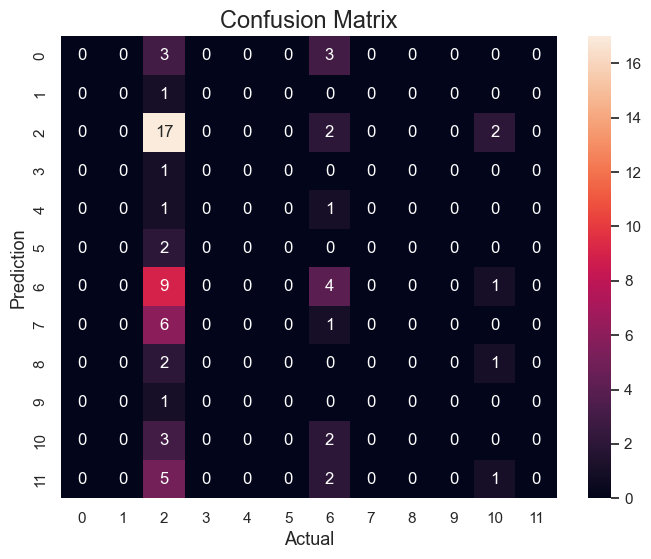

In [300]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [301]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


clf = RandomForestClassifier()
clf.fit(X_train_scaled, Y_train)
predictions = clf.predict(X_test_scaled)
#Checking the Accuracy score
print('Accuracy Score:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy Score:   0.323943661971831
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.39      0.81      0.52        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.36      0.36      0.36        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       1.00      0.12      0.22         8

   micro avg       0.32      0.32      0.32        71
   macro avg       0.12      0.09      0.07 

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

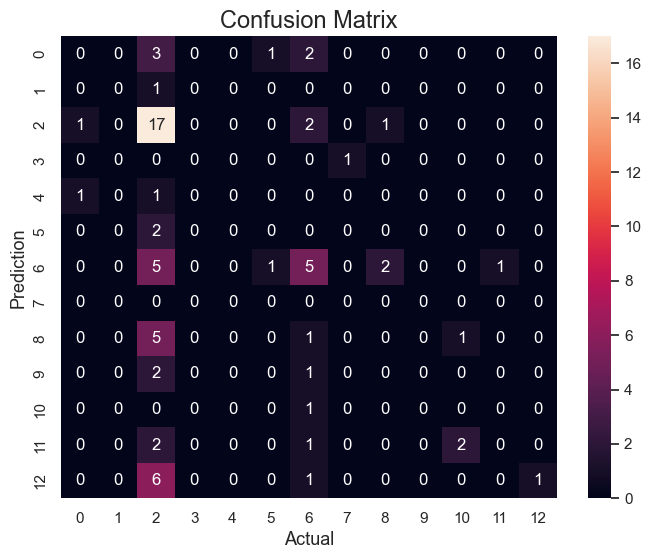

In [302]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [303]:
# 2nd Classifier 
# Trying with SVM
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_scaled, Y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test_scaled)

#Checking the Accuracy score
print('Accuracy:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy:   0.29577464788732394
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.31      0.95      0.47        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.20      0.07      0.11        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.30      0.30      0.30        71
   macro avg       0.03      0.07      0.04     

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

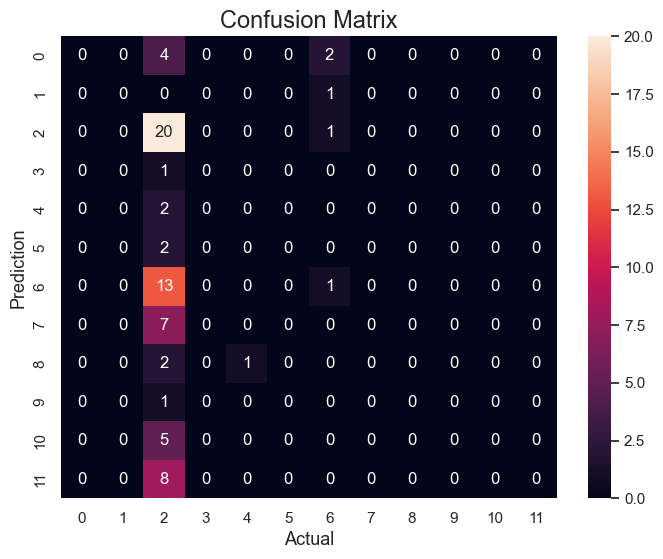

In [304]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [305]:
# Trying with Logistic Regression
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_scaled, Y_train)

predictions = logreg.predict(X_test_scaled)

#Checking the Accuracy score
print('Accuracy:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy:   0.2676056338028169
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.29      0.71      0.41        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.24      0.29      0.26        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.27      0.27      0.27        71
   macro avg       0.03      0.07      0.04      

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

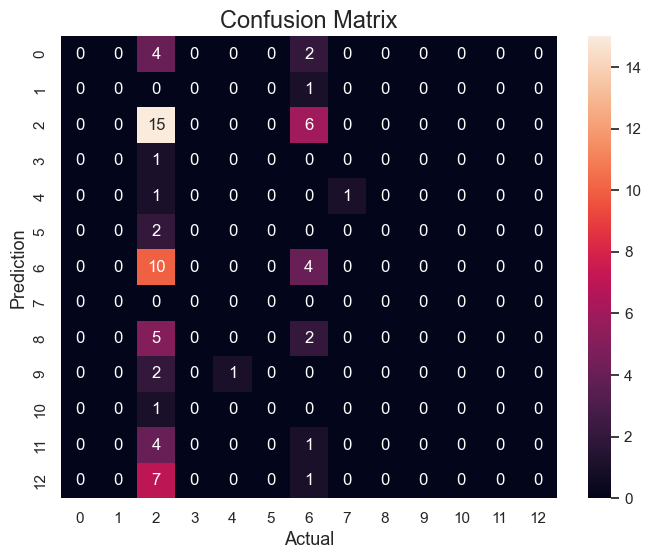

In [306]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [307]:
#Trying with Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_scaled, Y_train)
predictions = logreg.predict(X_test_scaled)
#Checking the Accuracy score
print('Accuracy:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))

Accuracy:   0.2676056338028169
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.29      0.71      0.41        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.24      0.29      0.26        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         8

   micro avg       0.27      0.27      0.27        71
   macro avg       0.03      0.07      0.04      

c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

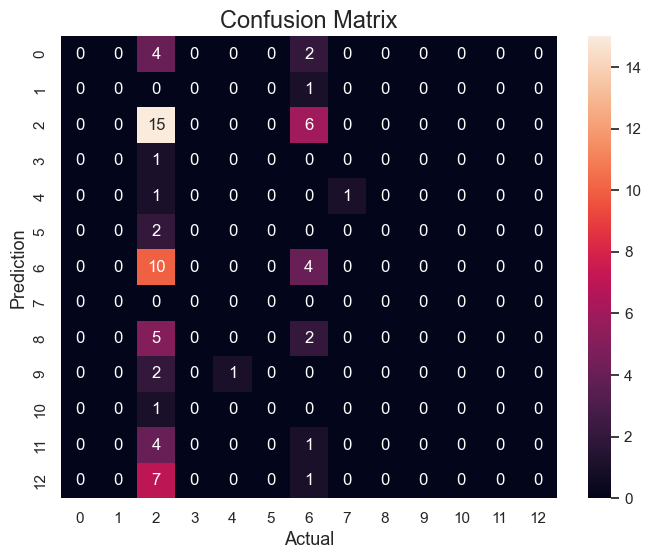

In [308]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [309]:
from sklearn.neural_network import MLPClassifier
# Simple MLP
MLP = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10)
MLP.fit(X_train_scaled, Y_train)


predictions = MLP.predict(X_test_scaled)

print('Accuracy:  ', accuracy_score(Y_test, predictions))
cm = metrics.confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

Accuracy:   0.29577464788732394
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.30      1.00      0.46        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1

   micro avg       0.30      0.36      0.33        58
   macro avg       0.02      0.08      0.04        58
weighted avg       0.11      0.36      0.17        58



c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: Undefin

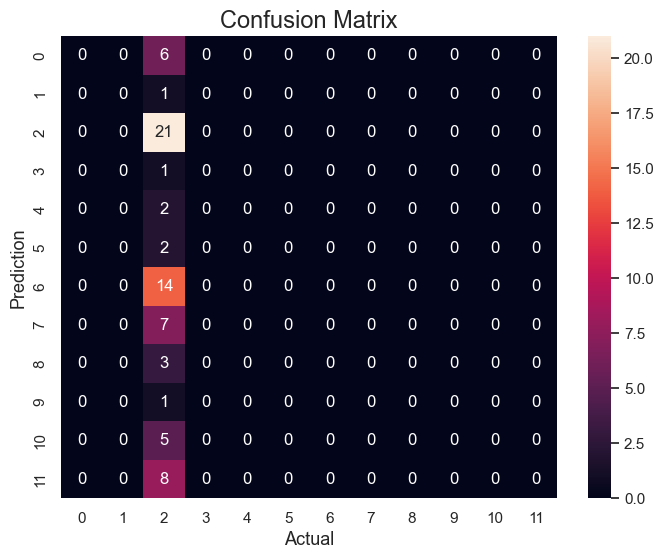

In [310]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [311]:
#Trying with Neural Network
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', 
                    alpha=0.001,
                    hidden_layer_sizes=(6, 2), 
                    random_state=1)
MLP.fit(X_train_scaled, Y_train)


predictions2 = MLP.predict(X_test_scaled)

print('Accuracy:  ', accuracy_score(Y_test, predictions2))
cm2 = metrics.confusion_matrix(Y_test, predictions2)
print(classification_report(Y_test, predictions2, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

# interpretations where errors.
# predict shape of tinnitus
# main finding in powerpoint
# 

Accuracy:   0.28169014084507044
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.29      0.95      0.44        21
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1

   micro avg       0.28      0.34      0.31        58
   macro avg       0.02      0.07      0.03        58
weighted avg       0.10      0.34      0.16        58



c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anaconda3\envs\tinnitus\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\billu\anacon

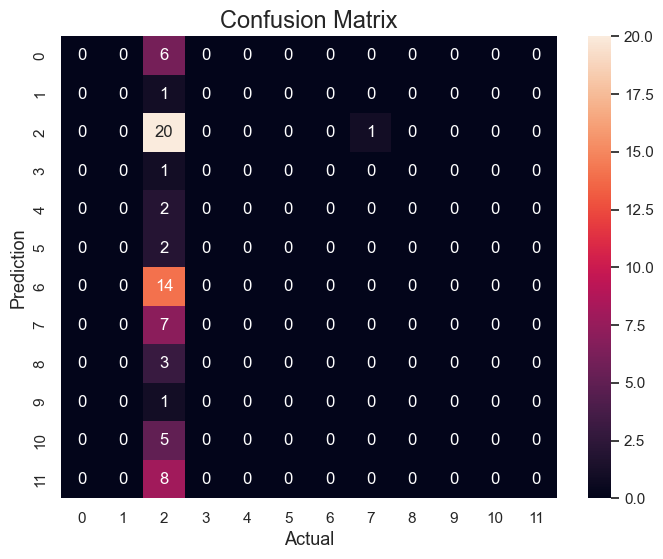

In [312]:
# Plot the confusion matrix.
sns.heatmap(cm2,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()